Importing required libraries and the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,LogisticRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
file_path = '/content/drive/MyDrive/Cognifyz Internship/Dataset/Dataset.csv'
df = pd.read_csv(file_path)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [ ]:
df.shape

(9551, 21)

Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
del df['Restaurant Name']
del df['Country Code']
# del df['City']
del df['Address']
del df['Locality Verbose']
del df['Longitude']
del df['Latitude']
# del df['Is delivering now']
# del df['Switch to order menu']
del df['Rating color']
df.head()

,Restaurant ID,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes
0,6317637,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Excellent,314
1,6304287,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Excellent,591
2,6300002,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Very Good,270
3,6318506,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Excellent,365
4,6314302,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Excellent,229


In [ ]:
df.duplicated().sum()

0

In [ ]:
(df.isna().sum()/df.shape[0])*100

Restaurant ID           0.000000
City                    0.000000
Locality                0.000000
Cuisines                0.094231
Average Cost for two    0.000000
Currency                0.000000
Has Table booking       0.000000
Has Online delivery     0.000000
Is delivering now       0.000000
Switch to order menu    0.000000
Price range             0.000000
Aggregate rating        0.000000
Rating text             0.000000
Votes                   0.000000
dtype: float64

In [ ]:
df['Cuisines'].isna().sum()

9

In [ ]:
df['Votes']=df['Votes'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   City                  9551 non-null   object 
 2   Locality              9551 non-null   object 
 3   Cuisines              9542 non-null   object 
 4   Average Cost for two  9551 non-null   int64  
 5   Currency              9551 non-null   object 
 6   Has Table booking     9551 non-null   object 
 7   Has Online delivery   9551 non-null   object 
 8   Is delivering now     9551 non-null   object 
 9   Switch to order menu  9551 non-null   object 
 10  Price range           9551 non-null   int64  
 11  Aggregate rating      9551 non-null   float64
 12  Rating text           9551 non-null   object 
 13  Votes                 9551 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 1.0+ MB


In [ ]:
df['Cuisines'].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [ ]:
df['Cuisines']=df['Cuisines'].str.replace(" ","")
df['Cuisines']=df['Cuisines'].str.replace('-','NaN')
df['Cuisines']=df['Cuisines'].fillna('NaN')

df['Cuisines'].unique()

array(['French,Japanese,Desserts', 'Japanese',
       'Seafood,Asian,Filipino,Indian', ..., 'Burger,Izgara',
       'WorldCuisine,Patisserie,Cafe', 'Italian,WorldCuisine'],
      dtype=object)

In [ ]:
df.isna().sum()

Restaurant ID           0
City                    0
Locality                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating text             0
Votes                   0
dtype: int64

In [ ]:
df=df.rename(columns={"Average Cost for two" : "avg_cost",
                      "Has Table booking" : "book_table",
                      "Has Online delivery" : "online_delivery",
                      "Restaurant ID" : "rest_id",
                      "Price range" : "price_range",
                      "Aggregate rating" : "rating",
                      "Rating text" : "rating_text",
                      "Is delivering now" : "delivery_avail",
                      "Switch to order menu" : "order_menu"})
df.head()

,rest_id,City,Locality,Cuisines,avg_cost,Currency,book_table,online_delivery,delivery_avail,order_menu,price_range,rating,rating_text,Votes
0,6317637,Makati City,"Century City Mall, Poblacion, Makati City","French,Japanese,Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Excellent,314
1,6304287,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Excellent,591
2,6300002,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood,Asian,Filipino,Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Very Good,270
3,6318506,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese,Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Excellent,365
4,6314302,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese,Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Excellent,229


In [ ]:
df.isna().sum()

rest_id            0
City               0
Locality           0
Cuisines           0
avg_cost           0
Currency           0
book_table         0
online_delivery    0
delivery_avail     0
order_menu         0
price_range        0
rating             0
rating_text        0
Votes              0
dtype: int64

Visualising the main features required to evaluate the model

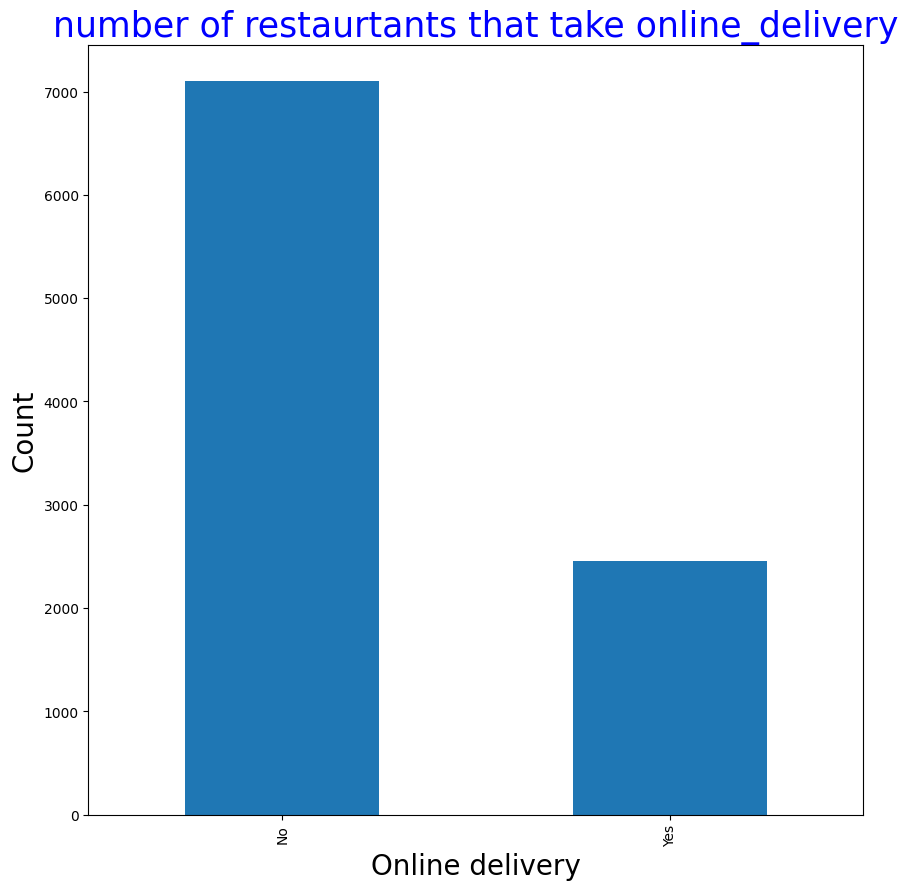

In [ ]:
plt.figure(figsize=(10,10))
df.online_delivery.value_counts().plot(kind="bar")
plt.title("number of restaurtants that take online_delivery",fontsize=25,color='blue')
plt.ylabel("Count",fontsize=20)
plt.xlabel("Online delivery",fontsize=20)
plt.show()

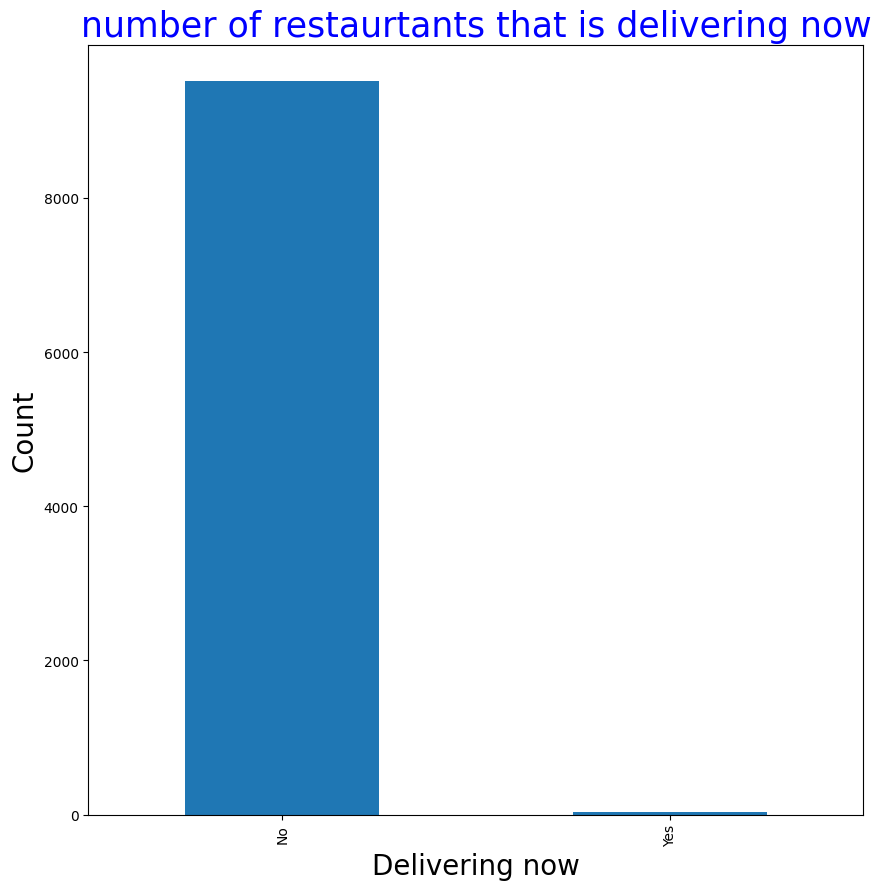

In [ ]:
plt.figure(figsize=(10,10))
df.delivery_avail.value_counts().plot(kind="bar")
plt.title("number of restaurtants that is delivering now",fontsize=25,color='blue')
plt.ylabel("Count",fontsize=20)
plt.xlabel("Delivering now",fontsize=20)
plt.show()

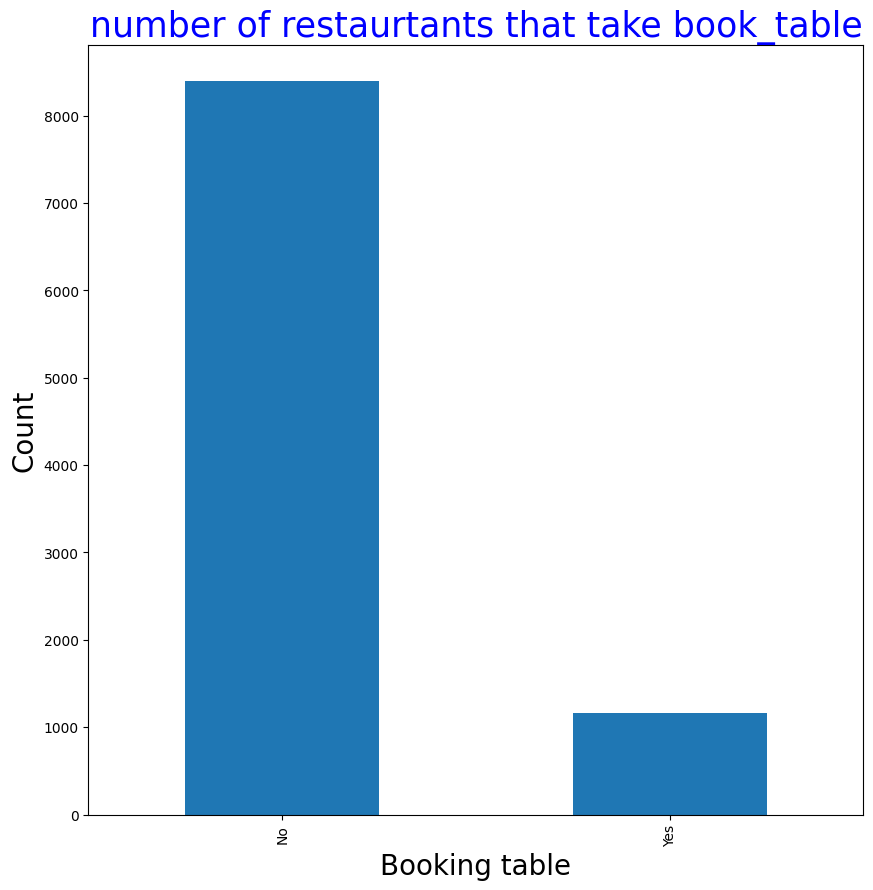

In [ ]:
plt.figure(figsize=(10,10))
df.book_table.value_counts().plot(kind="bar")
plt.title("number of restaurtants that take book_table",fontsize=25,color='blue')
plt.ylabel("Count",fontsize=20)
plt.xlabel("Booking table",fontsize=20)
plt.show()

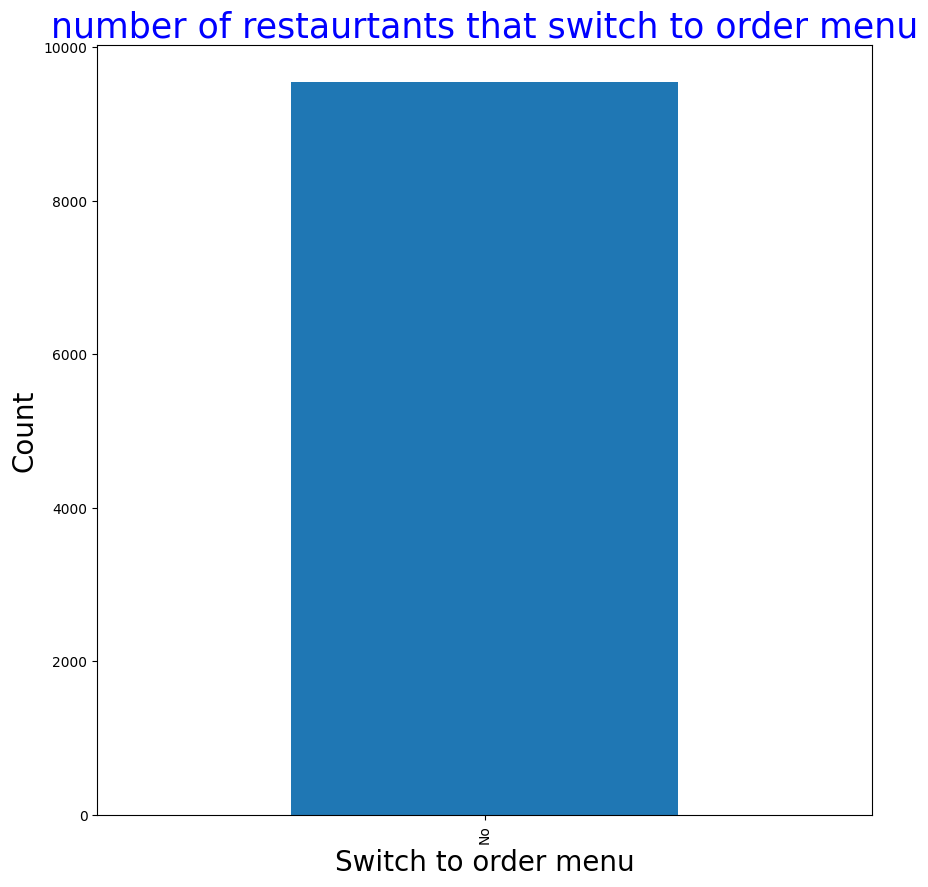

In [ ]:
plt.figure(figsize=(10,10))
df.order_menu.value_counts().plot(kind="bar")
plt.title("number of restaurtants that switch to order menu",fontsize=25,color='blue')
plt.ylabel("Count",fontsize=20)
plt.xlabel("Switch to order menu",fontsize=20)
plt.show()

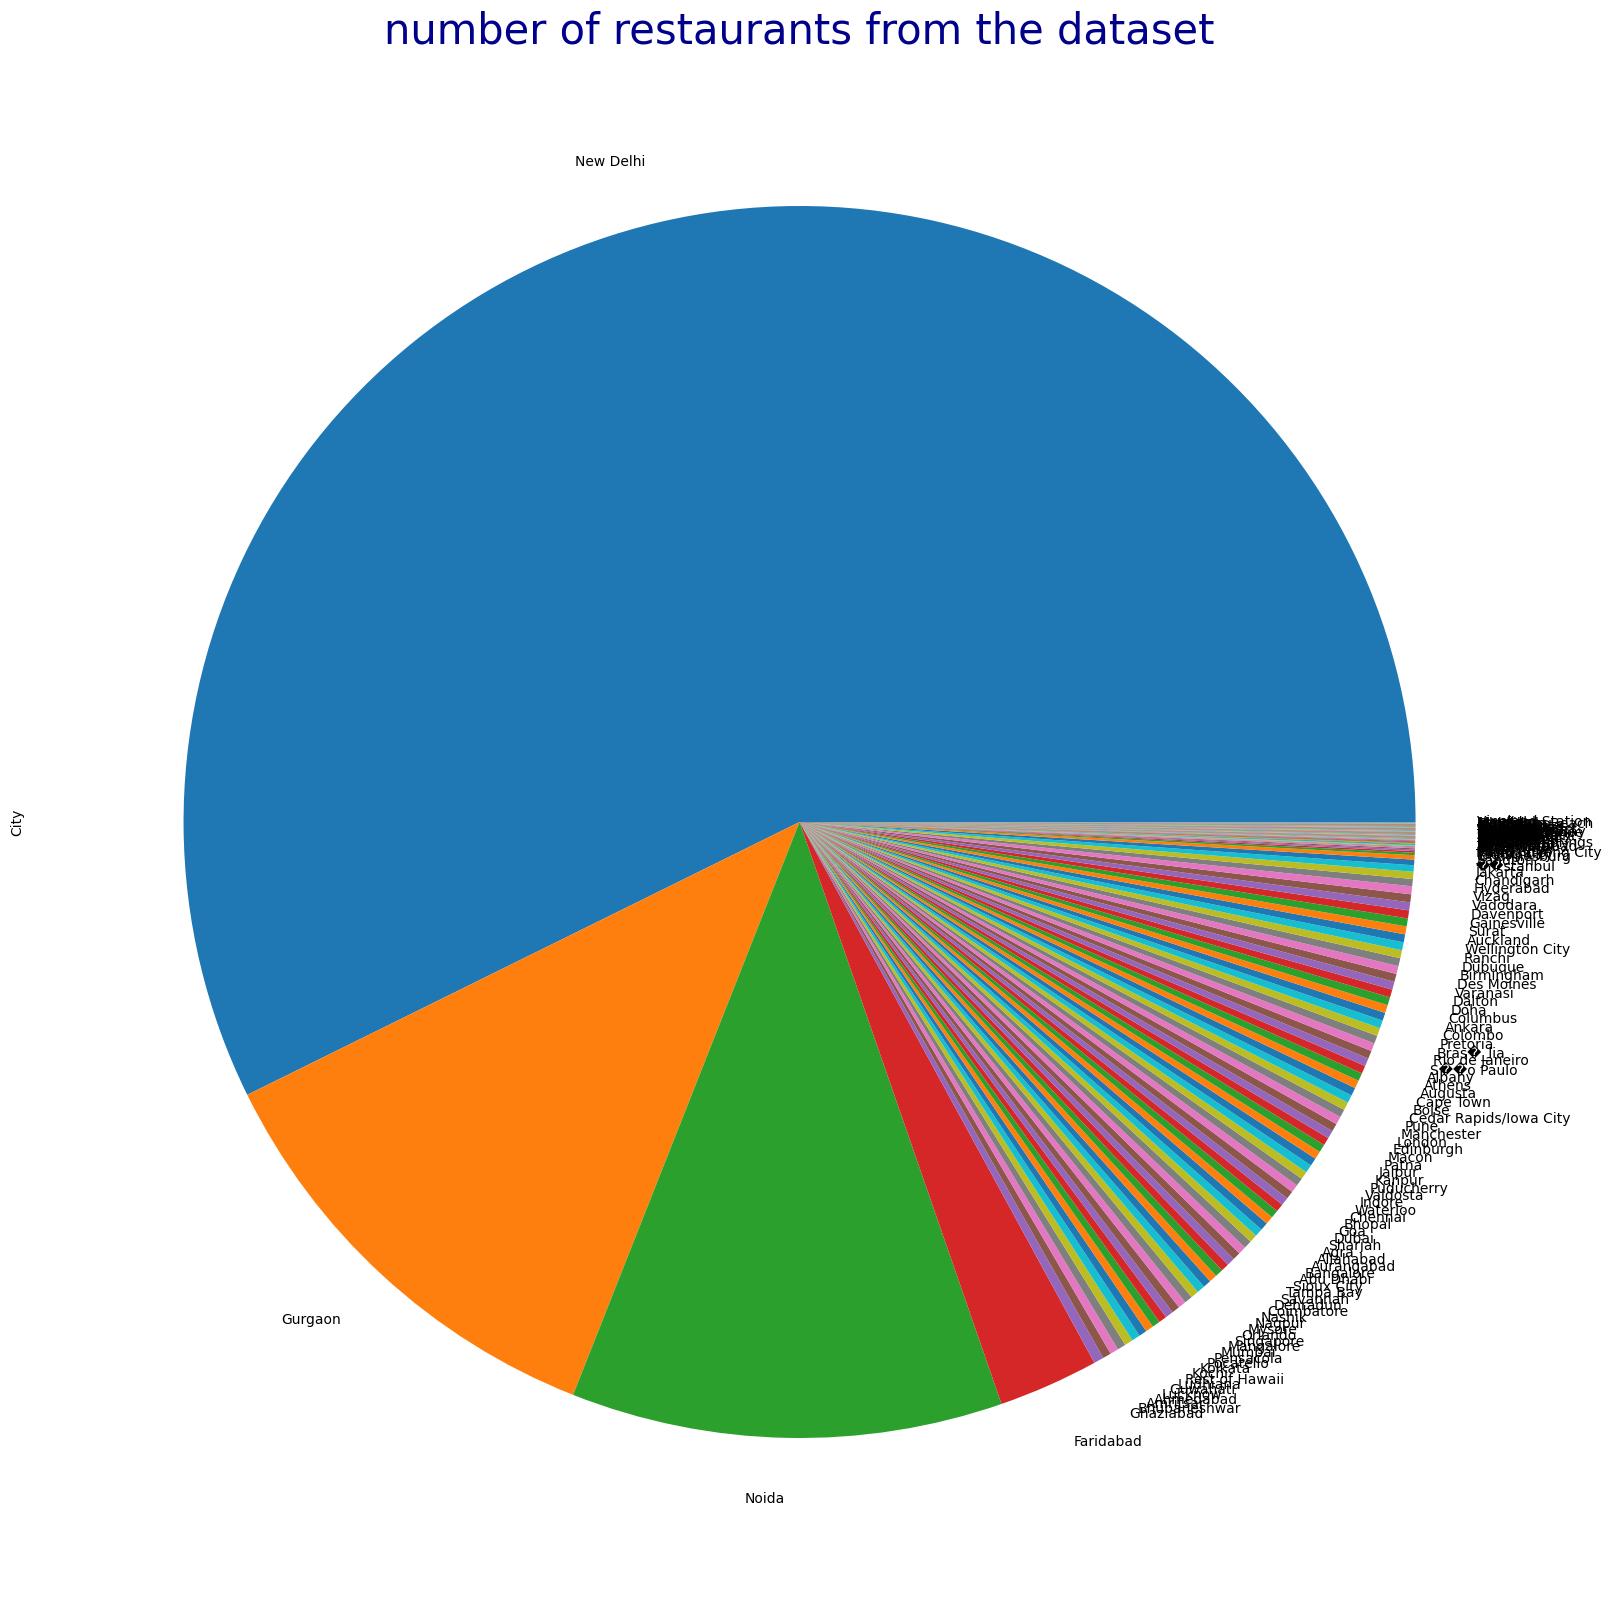

In [ ]:
plt.figure(figsize=(20,20))

ax=df.City.value_counts()
ax.plot(kind='pie',fontsize=10)
plt.title('number of restaurants from the dataset',fontsize=30,color='darkblue')
plt.show()

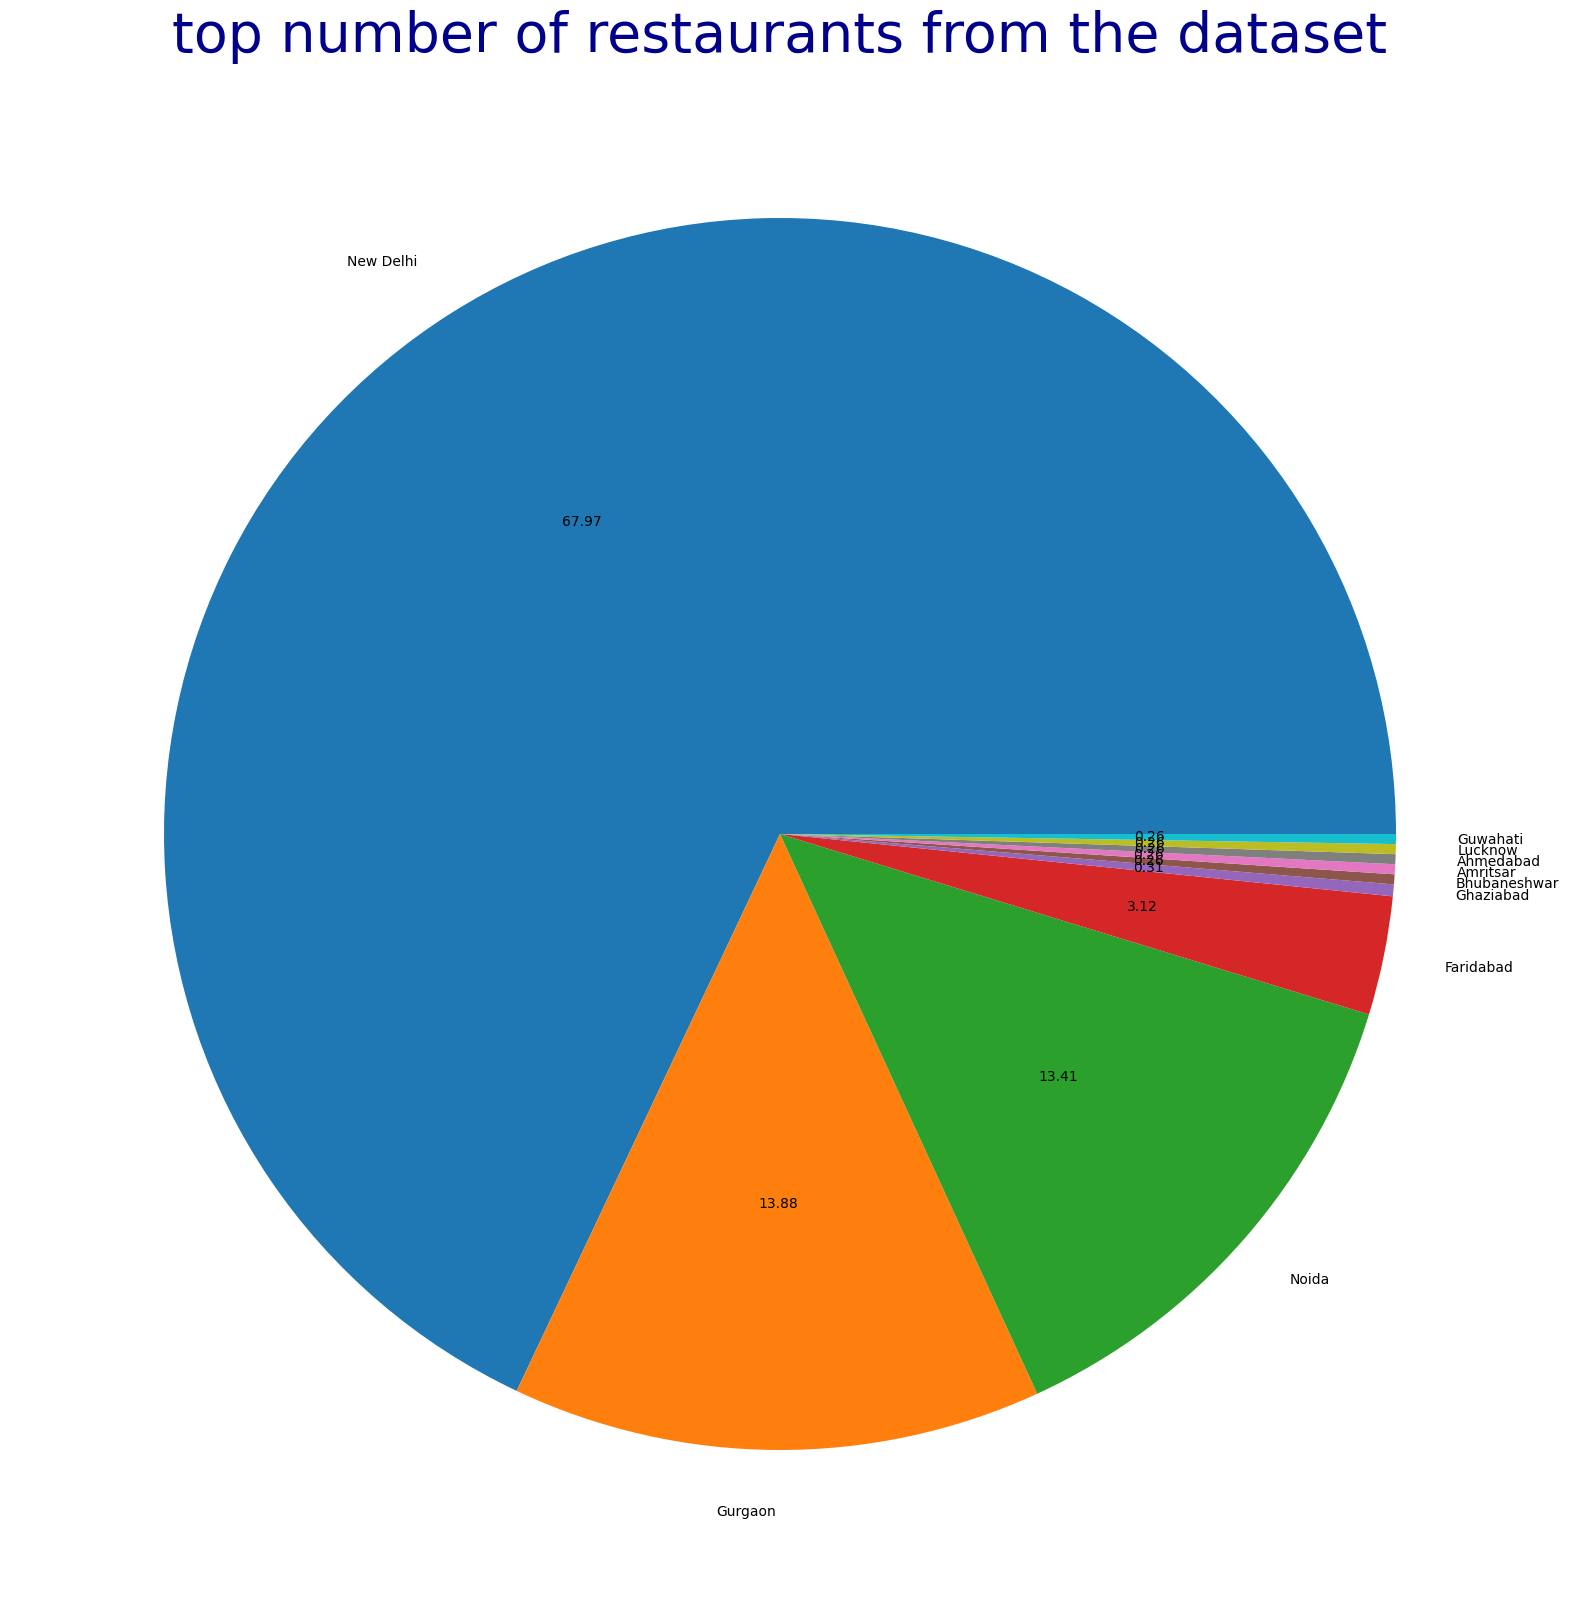

In [ ]:
plt.figure(figsize=(20,20))

ax=df.City.value_counts()[:10]
labels=df['City'].value_counts()[:10].index
plt.pie(ax,labels=labels,autopct='%.2f')
plt.title('top number of restaurants from the dataset',fontsize=40,color='darkblue')
plt.show()

Text(0, 0.5, 'Number of restaurants')

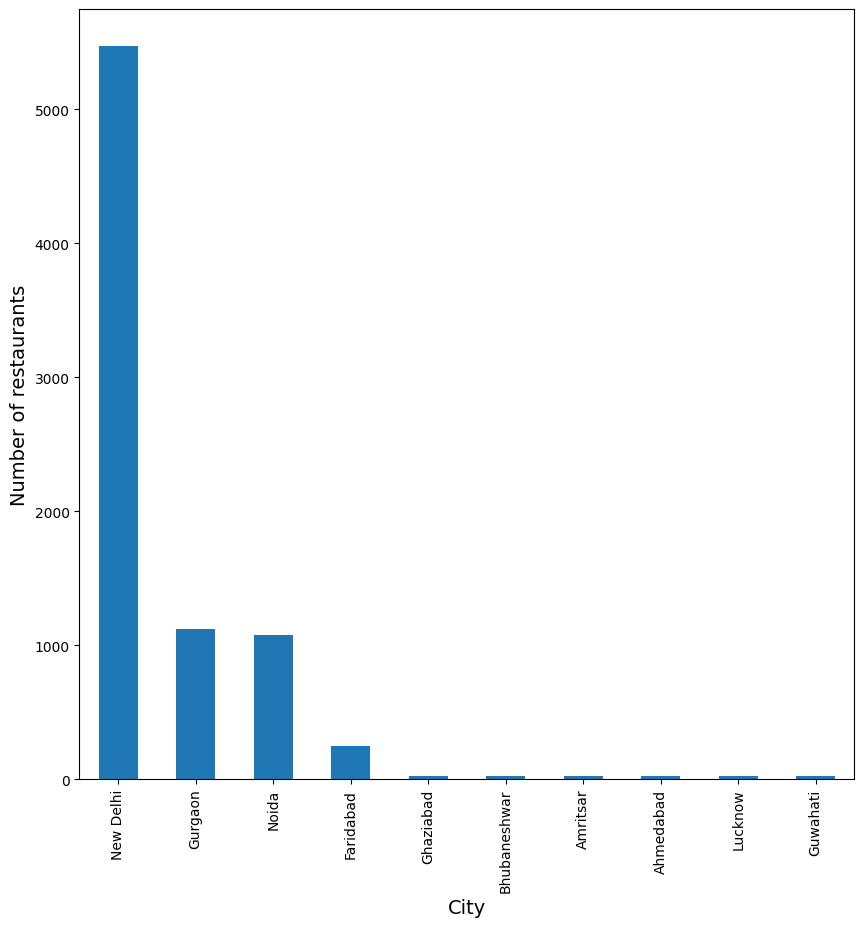

In [ ]:
plt.figure(figsize=(10,10))
ax=df.City.value_counts()[:10]
ax.plot(kind='bar')
plt.xlabel('City', fontsize = 14)
plt.ylabel('Number of restaurants', fontsize = 14)

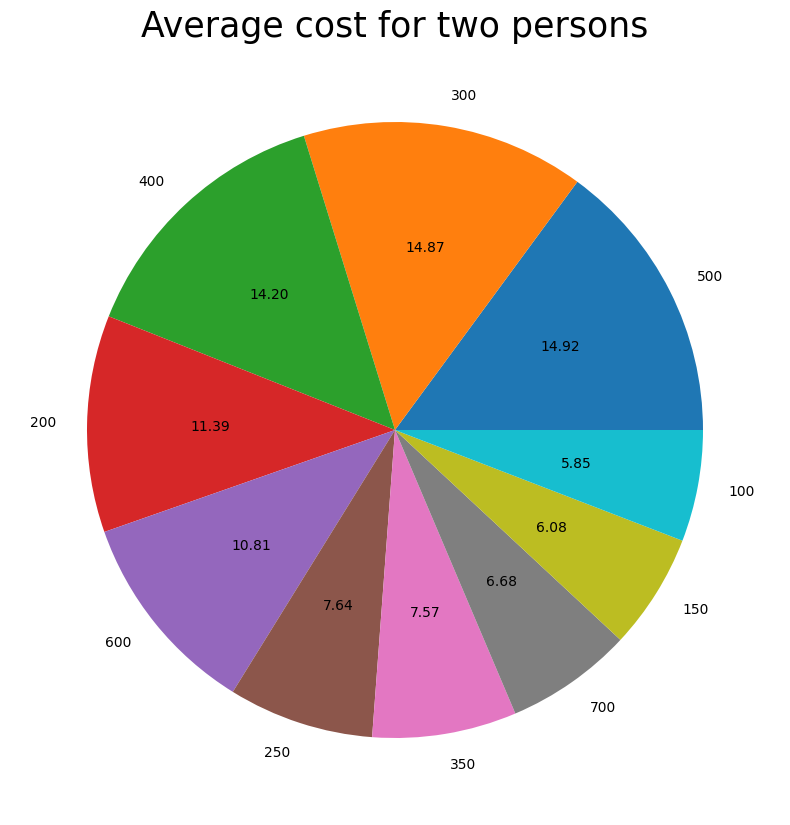

In [ ]:
plt.figure(figsize=(10,10))

ax=df.avg_cost.value_counts()[:10]
label=df['avg_cost'].value_counts()[:10].index

plt.pie(ax,labels=label,autopct='%.2f')

plt.title("Average cost for two persons",fontsize=25)
plt.show()

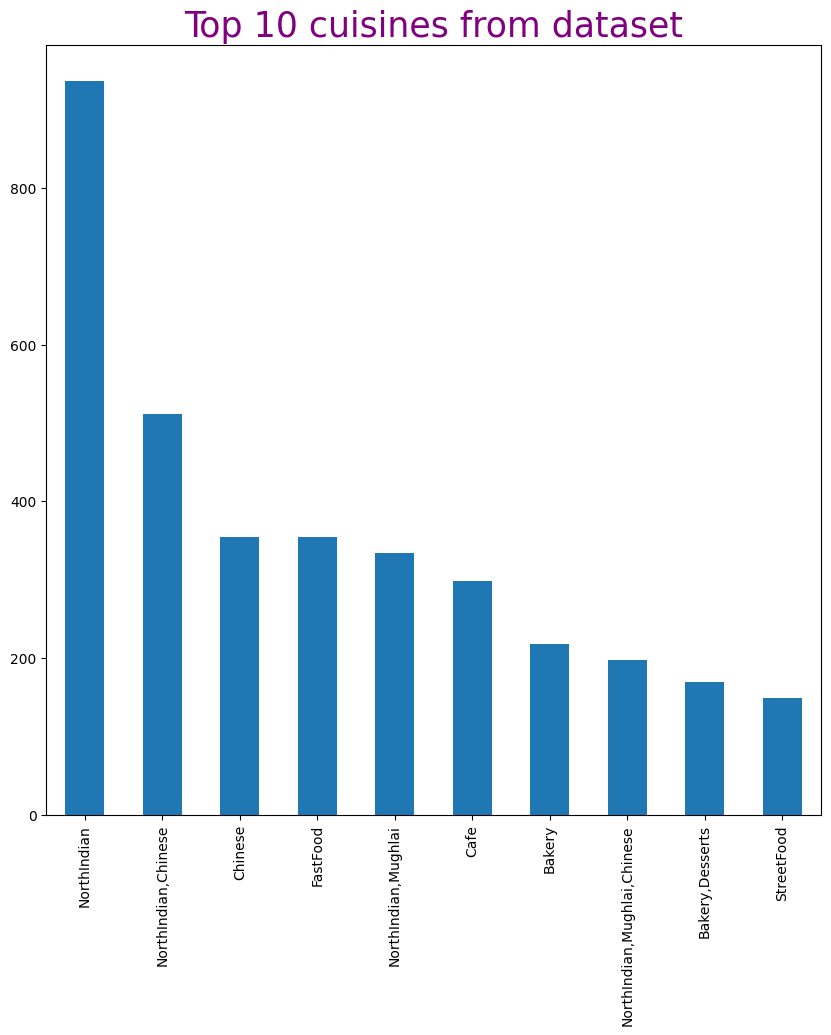

In [ ]:
plt.figure(figsize=(10,10))
ax=df['Cuisines'].value_counts()[:10]
ax.plot(kind='bar')
plt.title("Top 10 cuisines from dataset",fontsize=25,color='purple')
plt.show()

In [ ]:
df['rating']=df['rating'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rest_id          9551 non-null   int64  
 1   City             9551 non-null   object 
 2   Locality         9551 non-null   object 
 3   Cuisines         9551 non-null   object 
 4   avg_cost         9551 non-null   int64  
 5   Currency         9551 non-null   object 
 6   book_table       9551 non-null   object 
 7   online_delivery  9551 non-null   object 
 8   delivery_avail   9551 non-null   object 
 9   order_menu       9551 non-null   object 
 10  price_range      9551 non-null   int64  
 11  rating           9551 non-null   float64
 12  rating_text      9551 non-null   object 
 13  Votes            9551 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 1.0+ MB


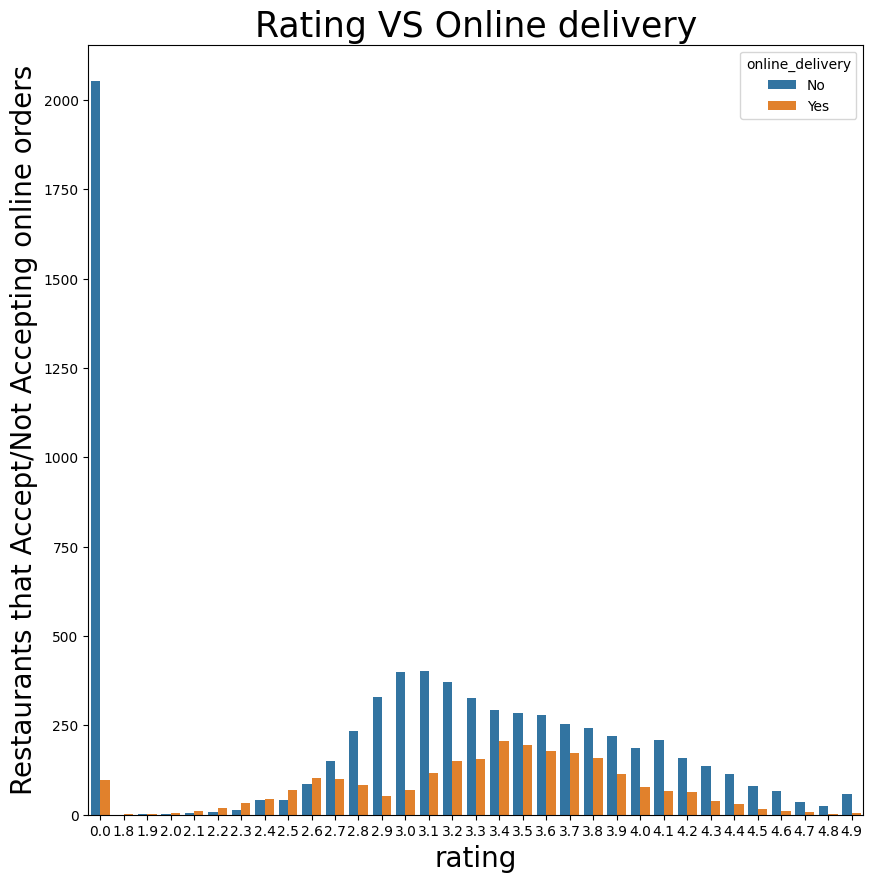

In [ ]:
plt.figure(figsize=(10,10))

sns.countplot(x=df['rating'],hue=df['online_delivery'])
plt.title("Rating VS Online delivery",fontsize=25)
plt.ylabel("Restaurants that Accept/Not Accepting online orders",fontsize=20)
plt.xlabel("rating",fontsize=20)
plt.show()

In [ ]:
df=df.drop(['rest_id', 'Locality', 'order_menu', 'rating_text', 'Currency'],axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
list1=['online_delivery','book_table','delivery_avail','Cuisines','City']
for i in list1:
    df[i]=le.fit_transform(df[i])

df.head()

,City,Cuisines,avg_cost,book_table,online_delivery,delivery_avail,price_range,rating,Votes
0,73,920,1100,1,0,0,3,4.8,314
1,73,1111,1200,1,0,0,3,4.5,591
2,75,1672,4000,1,0,0,4,4.4,270
3,75,1126,1500,0,0,0,4,4.9,365
4,75,1122,1500,1,0,0,4,4.8,229


In [ ]:
df.shape

(9551, 9)

In [ ]:
df.dropna(how='any',inplace=True)
df.shape

(9551, 9)

In [ ]:
features=df.drop(['rating'],axis=1)
features.shape

(9551, 8)

In [ ]:
features.dtypes

City               int64
Cuisines           int64
avg_cost           int64
book_table         int64
online_delivery    int64
delivery_avail     int64
price_range        int64
Votes              int64
dtype: object

In [ ]:
df['rating'].unique()

array([4.8, 4.5, 4.4, 4.9, 4. , 4.2, 4.3, 3.6, 4.7, 3. , 3.8, 3.7, 3.2,
       3.1, 0. , 4.1, 3.3, 4.6, 3.9, 3.4, 3.5, 2.2, 2.9, 2.4, 2.6, 2.8,
       2.1, 2.7, 2.5, 1.8, 2. , 2.3, 1.9])

In [ ]:
label=df['rating'].values
label

array([4.8, 4.5, 4.4, ..., 3.7, 4. , 4. ])

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [ ]:
features=StandardScaler().fit(features).transform(features)
features

array([[-2.28532756e-01, -1.35795634e-01, -6.15438439e-03, ...,
        -5.97708489e-02,  1.31980312e+00,  3.65201639e-01],
       [-2.28532756e-01,  2.35403151e-01,  4.89590650e-05, ...,
        -5.97708489e-02,  1.31980312e+00,  1.00916810e+00],
       [-1.42317314e-01,  1.32567812e+00,  1.73742576e-01, ...,
        -5.97708489e-02,  2.42409043e+00,  2.62910937e-01],
       ...,
       [ 2.65968456e+00,  2.33459702e-01, -6.38454785e-02, ...,
        -5.97708489e-02,  2.42409043e+00,  1.17190331e+00],
       [ 2.65968456e+00,  1.29846983e+00, -6.69471502e-02, ...,
        -5.97708489e-02,  2.42409043e+00,  1.72985259e+00],
       [ 2.65968456e+00, -1.28048718e+00, -7.09793235e-02, ...,
        -5.97708489e-02,  2.15515814e-01,  1.00916810e+00]])

Training, Testing, and Evaluating the model performance for various regression algorithms

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.10,random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8595, 8), (956, 8), (8595,), (956,))

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg

LinearRegression()

In [ ]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(lin_reg.score(X_train,y_train))
print(lin_reg.score(X_test,y_test))

0.2720974679413115
0.283249887608627


In [ ]:
lin_reg_pred=lin_reg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
lin_reg_score=r2_score(y_test,lin_reg_pred)*100
print("Accuracy score for LR :",lin_reg_score)

Accuracy score for LR : 28.324988760862702


In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
rr=Ridge()
rr

Ridge()

In [ ]:
rr.fit(X_train,y_train)

Ridge()

In [ ]:
print(rr.score(X_train,y_train))
print(rr.score(X_test,y_test))

0.2720974644437353
0.2832468667005883


In [ ]:
rr_pred=rr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
rr_score=r2_score(y_test,rr_pred)*100
print("Accuracy score for RidgeR :",rr_score)

Accuracy score for RidgeR : 28.32468667005883


In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lr=Lasso()
lr

Lasso()

In [ ]:
lr.fit(X_train,y_train)

Lasso()

In [ ]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.0
-0.0010149506163938948


In [ ]:
lr_pred=lr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

lr_score=r2_score(y_test,lr_pred)*100
print("Accuracy score for LR :",lr_score)

Accuracy score for LR : -0.10149506163938948


In [ ]:
rfr=RandomForestRegressor()
rfr

RandomForestRegressor()

In [ ]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
print(rfr.score(X_train,y_train))
print(rfr.score(X_test,y_test))

0.9935219831669859
0.9548688927010605


In [ ]:
rfr_pred=rfr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

rfr_score=r2_score(y_test,rfr_pred)*100
print("Accuracy score for RFR :",rfr_score)

Accuracy score for RFR : 95.48688927010605


In [ ]:
from sklearn.svm import SVR

In [ ]:
svr=SVR()
svr.fit(X_train,y_train)

SVR()

In [ ]:
print(svr.score(X_train,y_train))
print(svr.score(X_test,y_test))

0.3657779901345555
0.3801689896310442


In [ ]:
svr_pred=svr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

svr_score=r2_score(y_test,svr_pred)*100
print("Accuracy score for SVR :",svr_score)

Accuracy score for SVR : 38.01689896310442


Showing model output

In [ ]:
pd.DataFrame({"Model Names":['Linear Regression','Ridge Regression','Lasso Regression','Random Forest Regression','Support Vector Regression'],
            "Accuracy score":[lin_reg_score,rr_score,lr_score,rfr_score,svr_score]}).sort_values(by="Accuracy score", ascending=False)

,Model Names,Accuracy score
3,Random Forest Regression,95.486889
4,Support Vector Regression,38.016899
0,Linear Regression,28.324989
1,Ridge Regression,28.324687
2,Lasso Regression,-0.101495


In [ ]:
rfr.predict([[73,920,1100,1,0,0,3,314]])

array([4.471])

In [ ]:
sample=pd.DataFrame({"Actual Rating":y_test, "Predicted Rating":np.round(rfr_pred,2)})
sample

,Actual Rating,Predicted Rating
0,2.1,3.28
1,4.1,3.03
2,3.2,3.01
3,4.4,3.79
4,3.5,3.11
...,...,...
951,3.4,3.48
952,3.2,3.11
953,4.3,4.42
954,4.9,4.43


In [ ]:
sample.to_csv("Prediction of Model.csv",index=False)

In [ ]:
from google.colab import files
files.download("Prediction of Model.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>